<a href="https://colab.research.google.com/github/Samuel-Buarque/Machine-_Learn_Python/blob/main/heart_disease_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

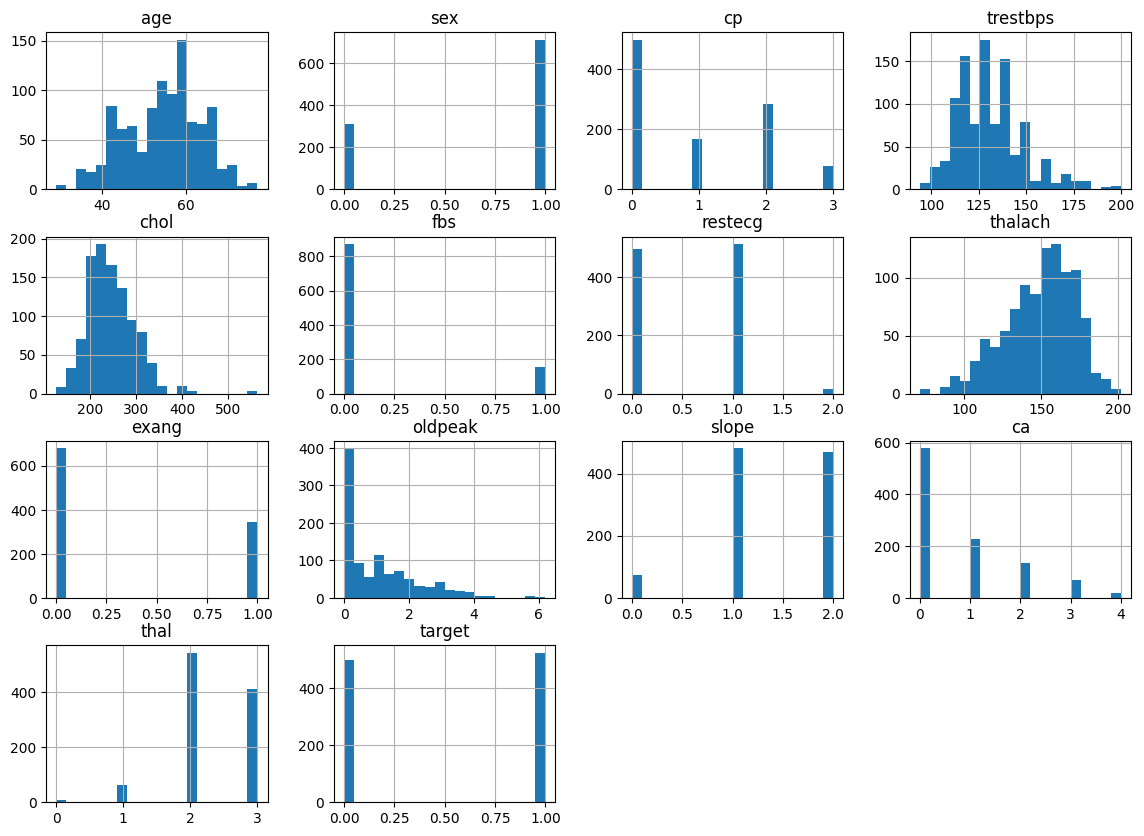

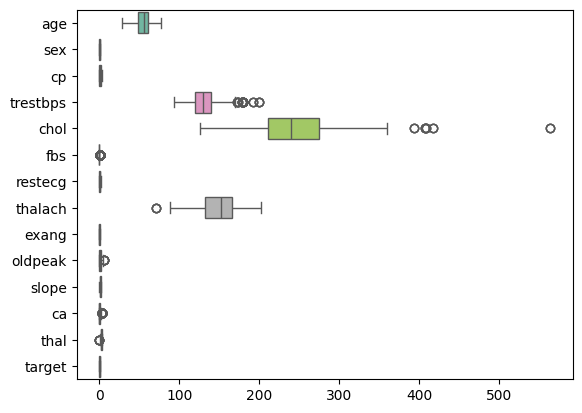

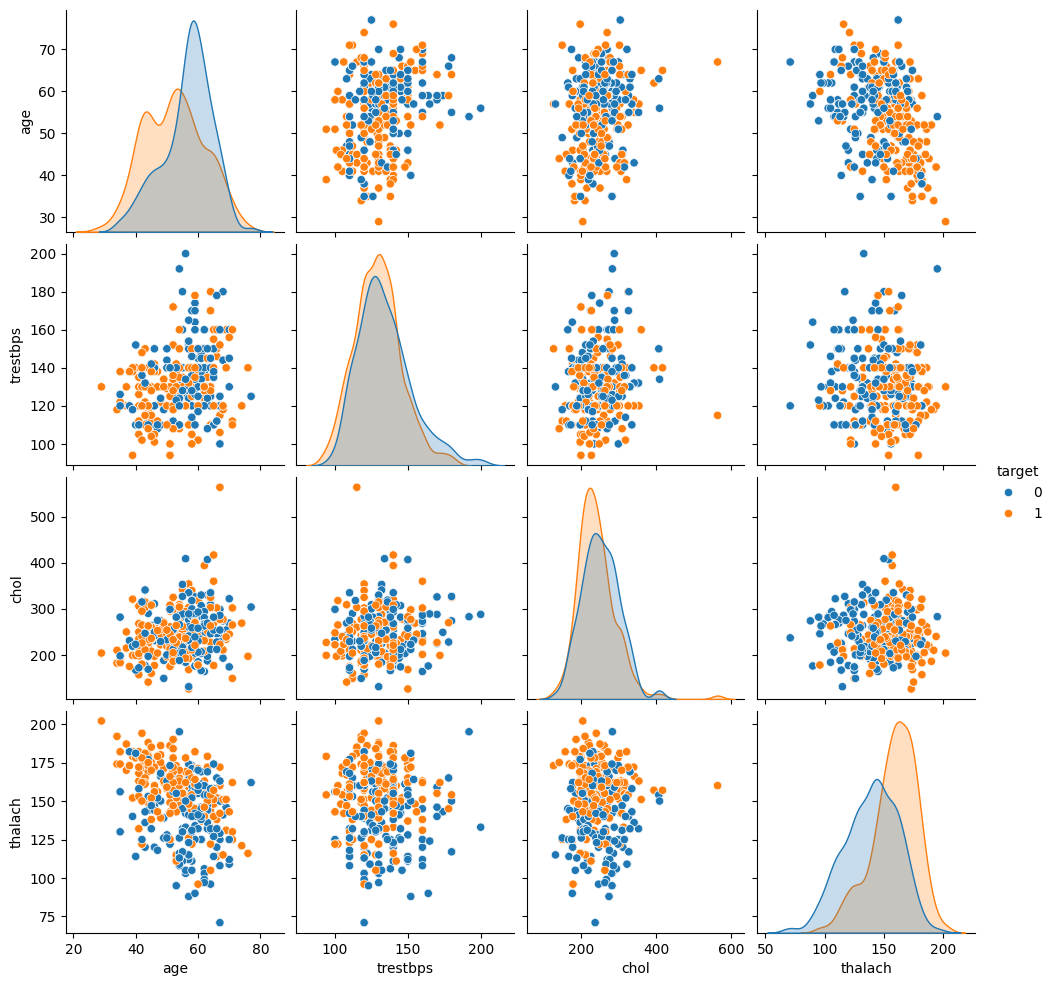

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar a base de dados localmente
url = "/content/heart.csv"
df = pd.read_csv(url)

# Análise básica
print(df.info())
print(df.describe())

# Verificar distribuição das variáveis
df.hist(bins=20, figsize=(14, 10))
plt.show()

# Verificar a presença de outliers
sns.boxplot(data=df, orient='h', palette='Set2')
plt.show()

# Selecionar um subconjunto de colunas para o pairplot
subset_df = df[['age', 'trestbps', 'chol', 'thalach', 'target']]

# Pairplot para o subset do dataset original
sns.pairplot(subset_df, hue='target')
plt.show()




In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separar características (X) e o rótulo (y)
X = df.drop('target', axis=1)
y = df['target']

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizar os dados
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X)


Arquitetura 1:
Precision: 0.9858156028368794
Recall: 0.9328859060402684
Accuracy: 0.961038961038961
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       159
           1       0.99      0.93      0.96       149

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



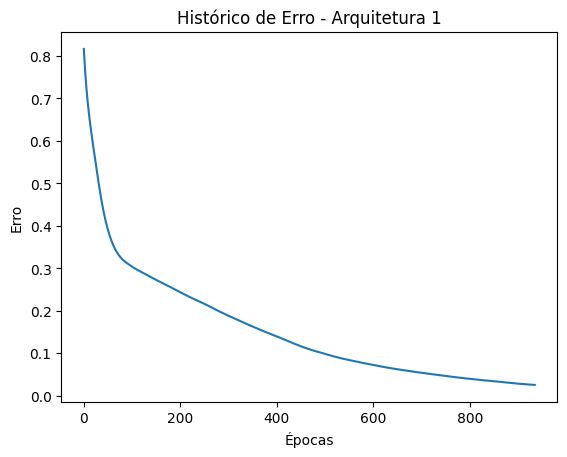

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Arquitetura 1
mlp1 = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=2000, random_state=42)

# Treinar o modelo
mlp1.fit(X_train, y_train)

# Previsões
y_pred1 = mlp1.predict(X_test)

# Avaliar o modelo
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
accuracy1 = accuracy_score(y_test, y_pred1)

print('Arquitetura 1:')
print(f'Precision: {precision1}')
print(f'Recall: {recall1}')
print(f'Accuracy: {accuracy1}')
print('Classification Report:')
print(classification_report(y_test, y_pred1))

# Plotar histórico de erro
plt.plot(mlp1.loss_curve_)
plt.title('Histórico de Erro - Arquitetura 1')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.show()


Arquitetura 2:
Precision: 1.0
Recall: 0.9395973154362416
Accuracy: 0.9707792207792207
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



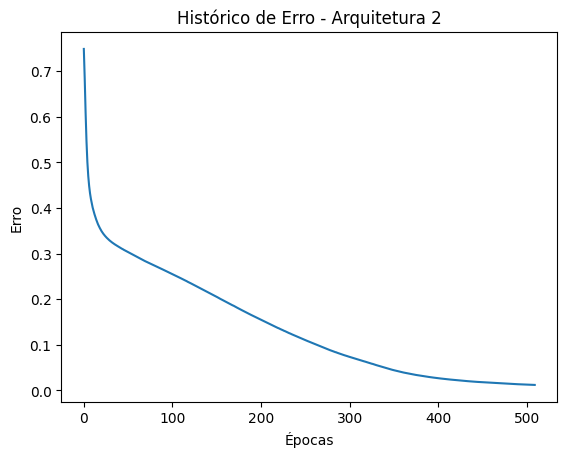

In [ ]:
# Arquitetura 2
mlp2 = MLPClassifier(hidden_layer_sizes=(20, 10), activation='tanh', solver='sgd', learning_rate_init=0.01, max_iter=2000, random_state=42)

# Treinar o modelo
mlp2.fit(X_train, y_train)

# Previsões
y_pred2 = mlp2.predict(X_test)

# Avaliar o modelo
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
accuracy2 = accuracy_score(y_test, y_pred2)

print('Arquitetura 2:')
print(f'Precision: {precision2}')
print(f'Recall: {recall2}')
print(f'Accuracy: {accuracy2}')
print('Classification Report:')
print(classification_report(y_test, y_pred2))

# Plotar histórico de erro
plt.plot(mlp2.loss_curve_)
plt.title('Histórico de Erro - Arquitetura 2')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.show()


In [ ]:
import numpy as np

# Resultados resumidos
results = pd.DataFrame({
    'Arquitetura': ['MLP 1', 'MLP 2'],
    'Precision': [precision1, precision2],
    'Recall': [recall1, recall2],
    'Accuracy': [accuracy1, accuracy2]
})

print(results)


  Arquitetura  Precision    Recall  Accuracy
0       MLP 1   0.985816  0.932886  0.961039
1       MLP 2   1.000000  0.939597  0.970779


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Definir a arquitetura do Autoencoder
input_dim = X_scaled.shape[1]
encoding_dim = 10  # Dimensão da camada codificada

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compilar o modelo
autoencoder.compile(optimizer='adam', loss='mse')

# Treinar o Autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=16, shuffle=True, validation_split=0.2, verbose=1)

# Codificar os dados
encoder_model = Model(inputs=input_layer, outputs=encoder)
encoded_data = encoder_model.predict(X_scaled)

print("Dados codificados usando Autoencoder:")
print(encoded_data[:5])


Epoch 1/100
52/52 [==============================] - 3s 20ms/step - loss: 1.3071 - val_loss: 1.1867
Epoch 2/100
52/52 [==============================] - 0s 6ms/step - loss: 1.2349 - val_loss: 1.1270
Epoch 3/100
52/52 [==============================] - 0s 8ms/step - loss: 1.1725 - val_loss: 1.0721
Epoch 4/100
52/52 [==============================] - 0s 4ms/step - loss: 1.1133 - val_loss: 1.0181
Epoch 5/100
52/52 [==============================] - 0s 4ms/step - loss: 1.0554 - val_loss: 0.9650
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.9993 - val_loss: 0.9150
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.9488 - val_loss: 0.8714
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.9064 - val_loss: 0.8365
Epoch 9/100
52/52 [==============================] - 0s 3ms/step - loss: 0.8736 - val_loss: 0.8097
Epoch 10/100
52/52 [==============================] - 0s 3ms/step - loss: 0.8489 - val_loss: 0.7883
Epoch 11

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


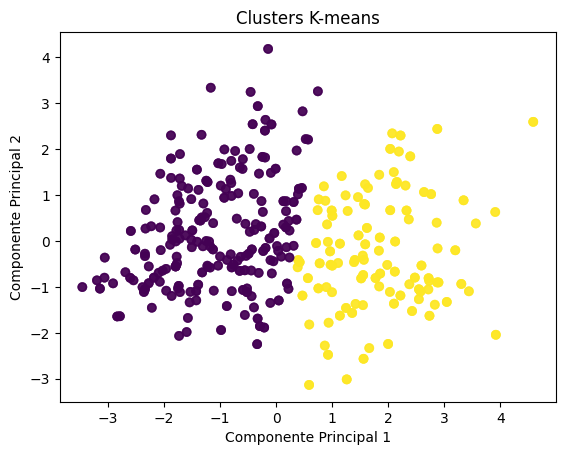

Silhouette Score: 0.1695573999446485


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Reduzir a dimensionalidade dos dados para 2D usando PCA para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Aplicar K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

# Visualizar os clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('Clusters K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Avaliar os clusters
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette_avg}')


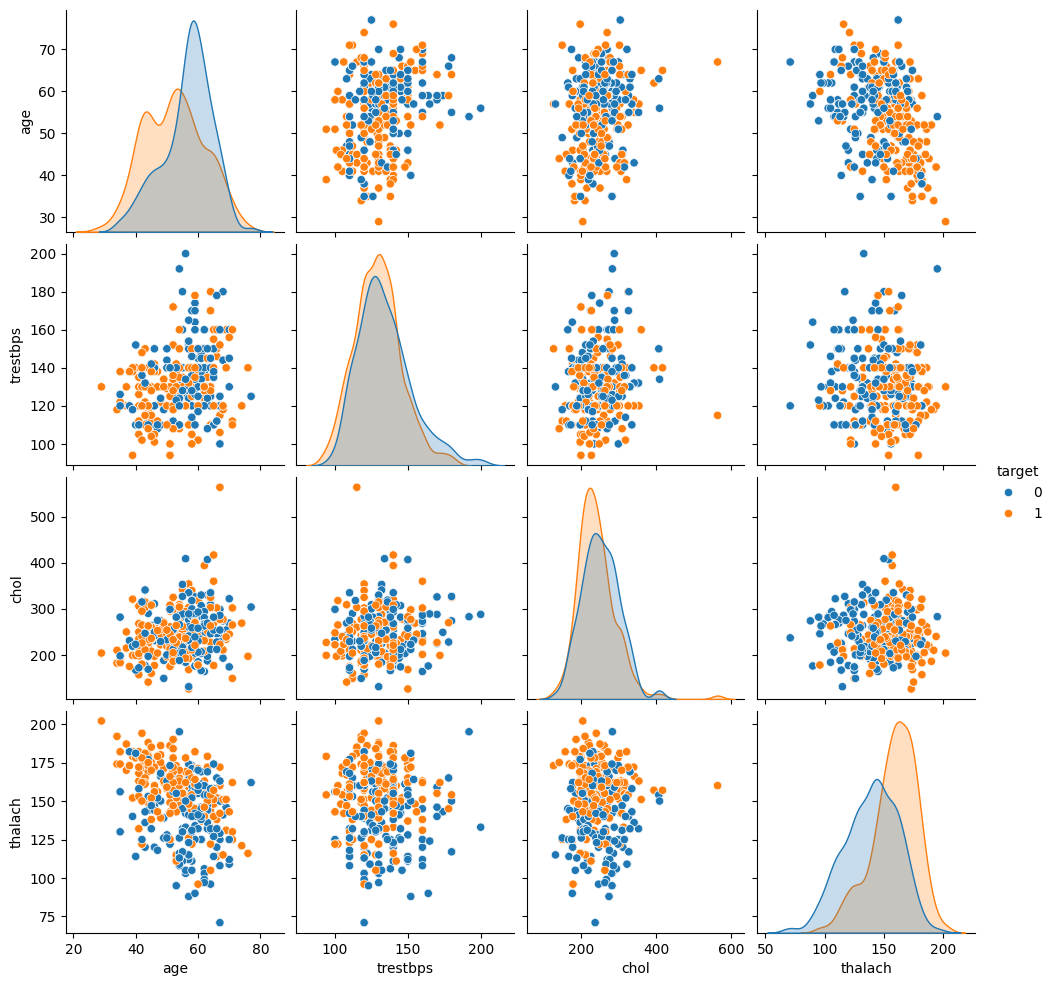

In [ ]:
# Renomear colunas e preparar os dados para o pairplot
colunas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df.columns = colunas

# Selecionar um subconjunto de colunas para o pairplot
subset_df_autoencoder = df[['age', 'trestbps', 'chol', 'thalach', 'target']]

# Pairplot para o subset do dataset original
sns.pairplot(subset_df_autoencoder, hue='target')
plt.show()

